In [1]:
import numpy as np
import scipy.stats as ss
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('311_Service_Requests_-_Miami-Dade_County.csv', 
                       sep = ',',
                       keep_default_na=True,
                       dtype={'Ticket ID' : str,
                              'Issue Type' : str, 
                              'Issue Description' : str,
                              'Case Owner' : str,
                              'Case Owner Description' : str, 
                              'Street Address' : str,
                              'City' : str,
                              'State Province' : str,
                              'Zip/Postal Code' : str,
                              'Neighborhood/District/Ward/etc.' : str,
                              'Created Year Month' : np.float64,
                              'Ticket Created Date/Time' : str,
                              'Ticket Last Updated Date/Time' : str,
                              'Ticket Closed Date/Time' : str,
                              'Ticket Status' : str,
                              'X Coordinate' : np.float64,
                              'Y Coordinate' : np.float64,
                              'Latitude'  : np.float64,
                              'Longitude' : np.float64,
                              'Location Geo. Coded' : str,
                              'Method Received' : str,
                              'Goal Days' : np.float64,
                              'Actual Completed Days' : np.float64,
                             })

In [2]:
data.shape

(653835, 23)

**Note:** The number of rows and columns corresponds to the expected values from the Miami-Dade county website

**Error resolution:** The pd.crosstab() function threw errors regarding the Key Name when using lists of column names that included a front slash or other special character. From the github website:
https://github.com/pandas-dev/pandas/issues/12858

A solution to this problem was found on stack-overflow, by defining a new list of column names and reassigning these values to the dataframe.
https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

In [6]:
column_names = ['TicketID','IssueType','IssueDescription','CaseOwner','CaseOwnerDescription','StreetAddress',
                              'City','StateProvince','ZipPostalCode','NeighborhoodDistrictWardetc',
                              'CreatedYearMonth','TicketCreatedDateTime','TicketLastUpdatedDateTime','TicketClosedDateTime',
                              'TicketStatus','XCoordinate','YCoordinate','Latitude','Longitude',
                              'LocationGeoCoded','MethodReceived','GoalDays','ActualCompletedDays']
data.columns = column_names

In [4]:
data.head()

,TicketID,IssueType,IssueDescription,CaseOwner,CaseOwnerDescription,StreetAddress,City,StateProvince,ZipPostalCode,NeighborhoodDistrictWardetc,...,TicketClosedDateTime,TicketStatus,XCoordinate,YCoordinate,Latitude,Longitude,LocationGeoCoded,MethodReceived,GoalDays,ActualCompletedDays
0,13-00000001,ASU POLICE ASSISTANCE,NaN,Animal_Services,Animal Services,7707 SW 117TH AVE,Miami_Dade_County,Florida,33173.0,District 10,...,01/01/2013 12:34:18 AM,CLOSED,859632.259755,495700.415381,25.696061,-80.382117,"7707 SW 117TH AVE\nMIAMI, Florida 33173\n(25.6...",MOBILE,1.0,0.0
1,13-00000002,ASU POLICE ASSISTANCE,NaN,Animal_Services,Animal Services,18800 NW 57TH AVE,Miami_Dade_County,Florida,33015.0,District 1,...,01/01/2013 01:46:44 AM,CLOSED,888138.472187,585887.469673,25.943794,-80.294085,"18800 NW 57TH AVE\nMIAMI, Florida 33015\n(25.9...",MOBILE,1.0,0.0
2,13-00000174,CAT TRAP REQUEST,NaN,Animal_Services,Animal Services,7897 SW 12TH ST,Miami_Dade_County,Florida,33144.0,District 10,...,01/10/2014 01:17:19 PM,CLOSED,878585.500000,518636.436000,25.758910,-80.324207,"7897 SW 12TH ST\nMIAMI, Florida 33144\n(25.758...",PHONE,15.0,374.0
3,13-00000175,PIT BULL INVESTIGATION,NaN,Animal_Services,Animal Services,2985 SW 2ND ST,City_of_Miami,Florida,33135.0,District 5,...,02/13/2013 12:01:38 PM,CLOSED,905190.573399,522934.268098,25.770336,-80.243301,"2985 SW 2ND ST\nMIAMI, Florida 33135\n(25.7703...",PHONE,30.0,43.0
4,13-00000176,ANIMAL BITE TO A PERSON,NaN,Animal_Services,Animal Services,16630 SW 103RD PL,Miami_Dade_County,Florida,33157.0,District 9,...,01/10/2013 12:41:18 PM,CLOSED,866815.937500,466100.281250,25.614528,-80.360737,"16630 SW 103RD PL\nMIAMI, Florida 33157\n(25.6...",PHONE,14.0,9.0


**Note:** After confirming that there was no data present inside the Issue Description Column for all entries using the pd.crosstab() function, the column was removed for simplification. 

In [5]:
data = data.drop(['IssueDescription'], axis=1)

In [6]:
data_clean = data[data['CaseOwner'].isin(['Animal_Services'])]

**Note:** To begin looking for meaningful associations within the data, the DataFrame was narrowed to animal-related incidents. It was determined that the number of animal-related 311 cases included several thousand instances that could be further analyzed. However, this may not be the only large subset of data available. To determine the data distribution, a frequency table was generated around case owners.

In [7]:
data['CaseOwner'].value_counts()

Animal_Services                                 240406
Regulatory_and_Economic_Resources               170585
Public_Works_Road_And_Bridges-16-60             151187
RAAM-27-93                                       36099
Public_Works_traffic_Signals_And_Signs-15-60     20813
Public_Works_Traffic_Engineering-10-60           18164
COM_Code_Enforcement                             11628
Communications_Department                         2416
Public_Works_Construction-6-60                    2398
Public_Works_Right_Of_Way-4-60                     139
Name: CaseOwner, dtype: int64

**Observation:** Animal Services is the largest subset of case owners for 311 calls in the county. However, this is not the only interesting metric available. 

A value count is now used to determine the frequency of different types of animal-related incidents.

In [8]:
data_clean['IssueType'].value_counts()

PET ACCOUNT UPDATE                                55139
STRAY / DOG-AT-LARGE                              47178
DEAD ANIMAL PICKUP MD                             28009
INJURED ANIMAL                                    20894
STRAY DOG PICK UP - MD                            15027
ANIMAL CRUELTY INVESTIGATION                      14755
ASU POLICE ASSISTANCE                             12304
ANIMAL BITE TO A PERSON                           10595
ANIMAL SERVICES DOG TAG CHECK                      9733
LOST PET                                           5592
PIT BULL INVESTIGATION                             4261
TETHERED DOG                                       4175
ANIMAL SERVICES DOG TAG                            3761
ANIMAL CRUELTY FOLLOW-UP                           2831
DANGEROUS DOG INVESTIGATION                        2086
BREEDER / PET STORE COMPLAINTS AND INSPECTIONS     1055
PIT BULL FOLLOW-UP INVESTIGATION                    760
LICENSE APPLICATION REQUEST                     

The 'City' label is chosen next to see the distribution of cases across geographic locations.

In [9]:
data['City'].value_counts()

Miami_Dade_County              479694
City_of_Miami                   67663
City_of_Miami_Gardens           20192
City_of_Hialeah                 17854
Town_of_Cutler_Bay               7163
City_of_Homestead                6696
City_of_North_Miami              5396
City_of_North_Miami_Beach        4863
City_of_Miami_Beach              4469
City_of_Doral                    4406
City_of_Coral_Gables             3815
City_of_Opa-Locka                3814
City_of_Florida_City             2638
City_of_Miami_Lakes              2500
City_of_Pinecrest                2050
City_of_South_Miami              1896
Village_of_Palmetto_Bay          1790
City_of_Sweetwater               1788
City_of_Hialeah_Gardens          1654
City_of_Palmetto_Bay             1595
Miami_Shores_Village             1283
City_of_Miami_Springs            1231
Town_of_Medley                   1029
City_of_Aventura                 1015
City_of_West_Miami                726
CIty_of_Sunny_Isles_Beach         531
Village_of_E

**Note:** After looking at geographical and topical distribution of service requests data, the "completed days" column was selected as a column of interest due to it's quantifiable nature.

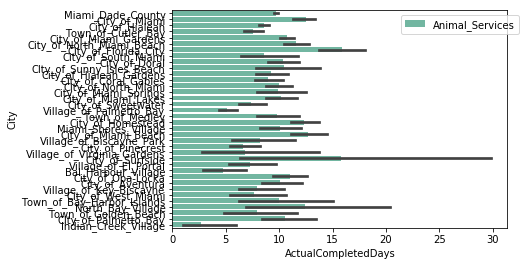

In [10]:
sns.barplot(data = data_clean, x = 'ActualCompletedDays', y = 'City', hue = 'CaseOwner', palette = 'Set2')

# Because seaborn is built on top of matplotlib, 
# you can use matplotlib's plt.legends to control the position of the legend
plt.legend(bbox_to_anchor = (1.05, 1))
plt.show()

**Observation:** The bar plot generated is far too large to accomodate all cities included in the miami-dade county region. The next step further filters the data by ommitting cities with small numbers of extremely variant data based on the bar plot and value counts.

In [11]:
data_clean[data_clean['City'].isin(['Miami_Dade_County','City_of_Miami', 'City_of_Miami_Gardens'])]

,TicketID,IssueType,CaseOwner,CaseOwnerDescription,StreetAddress,City,StateProvince,ZipPostalCode,NeighborhoodDistrictWardetc,CreatedYearMonth,...,TicketClosedDateTime,TicketStatus,XCoordinate,YCoordinate,Latitude,Longitude,LocationGeoCoded,MethodReceived,GoalDays,ActualCompletedDays
0,13-00000001,ASU POLICE ASSISTANCE,Animal_Services,Animal Services,7707 SW 117TH AVE,Miami_Dade_County,Florida,33173.0,District 10,20131.0,...,01/01/2013 12:34:18 AM,CLOSED,859632.259755,495700.415381,25.696061,-80.382117,"7707 SW 117TH AVE\nMIAMI, Florida 33173\n(25.6...",MOBILE,1.0,0.0
1,13-00000002,ASU POLICE ASSISTANCE,Animal_Services,Animal Services,18800 NW 57TH AVE,Miami_Dade_County,Florida,33015.0,District 1,20131.0,...,01/01/2013 01:46:44 AM,CLOSED,888138.472187,585887.469673,25.943794,-80.294085,"18800 NW 57TH AVE\nMIAMI, Florida 33015\n(25.9...",MOBILE,1.0,0.0
2,13-00000174,CAT TRAP REQUEST,Animal_Services,Animal Services,7897 SW 12TH ST,Miami_Dade_County,Florida,33144.0,District 10,20131.0,...,01/10/2014 01:17:19 PM,CLOSED,878585.500000,518636.436000,25.758910,-80.324207,"7897 SW 12TH ST\nMIAMI, Florida 33144\n(25.758...",PHONE,15.0,374.0
3,13-00000175,PIT BULL INVESTIGATION,Animal_Services,Animal Services,2985 SW 2ND ST,City_of_Miami,Florida,33135.0,District 5,20131.0,...,02/13/2013 12:01:38 PM,CLOSED,905190.573399,522934.268098,25.770336,-80.243301,"2985 SW 2ND ST\nMIAMI, Florida 33135\n(25.7703...",PHONE,30.0,43.0
4,13-00000176,ANIMAL BITE TO A PERSON,Animal_Services,Animal Services,16630 SW 103RD PL,Miami_Dade_County,Florida,33157.0,District 9,20131.0,...,01/10/2013 12:41:18 PM,CLOSED,866815.937500,466100.281250,25.614528,-80.360737,"16630 SW 103RD PL\nMIAMI, Florida 33157\n(25.6...",PHONE,14.0,9.0
6,13-00000178,ANIMAL BITE TO A PERSON,Animal_Services,Animal Services,21 SW 66TH AVE,City_of_Miami,Florida,33144.0,District 6,20131.0,...,01/11/2013 01:56:00 PM,CLOSED,885582.812500,522707.343750,25.770010,-80.302882,"21 SW 66TH AVE\nMIAMI, Florida 33144\n(25.7700...",PHONE,14.0,10.0
7,13-00000179,ANIMAL BITE TO A PERSON,Animal_Services,Animal Services,15396 SW 178TH TER,Miami_Dade_County,Florida,33187.0,District 9,20131.0,...,01/03/2013 12:13:47 PM,CLOSED,840040.437500,460874.875000,25.600483,-80.442057,"15396 SW 178TH TER\nMIAMI, Florida 33187\n(25....",PHONE,14.0,2.0
8,13-00000180,ANIMAL BITE TO A PERSON,Animal_Services,Animal Services,13145 SW 90TH CT,Miami_Dade_County,Florida,33176.0,District 8,20131.0,...,01/18/2013 01:56:51 PM,CLOSED,873511.937500,478269.031250,25.647918,-80.340234,"13145 SW 90TH CT\nMIAMI, Florida 33176\n(25.64...",PHONE,14.0,17.0
9,13-00000181,ANIMAL BITE TO A PERSON,Animal_Services,Animal Services,11463 SW 238TH ST,Miami_Dade_County,Florida,33032.0,District 8,20131.0,...,01/07/2013 01:35:21 PM,CLOSED,861387.625000,441322.531250,25.546426,-80.377563,"11463 SW 238TH ST\nMIAMI, Florida 33032\n(25.5...",PHONE,14.0,6.0
10,13-00000182,ANIMAL BITE TO A PERSON,Animal_Services,Animal Services,9245 SW 36TH ST,Miami_Dade_County,Florida,33165.0,District 10,20131.0,...,01/10/2013 04:07:07 PM,CLOSED,871966.125000,510561.250000,25.736784,-80.344440,"9245 SW 36TH ST\nMIAMI, Florida 33165\n(25.736...",PHONE,14.0,9.0


**Note:** It seems prudent at this point to remove the colum of data containing state, as the data is all taken from inside one county in Florida.

**Note on data_clean:** There are 176k entries for just the three largest divisions within Miami-Dade county. However. it is important to compare specificity of data for different categories. The next step will compare counts for categories 'City' and "zip/postal code'

In [12]:
data_clean = data_clean.drop(['StateProvince'], axis=1)

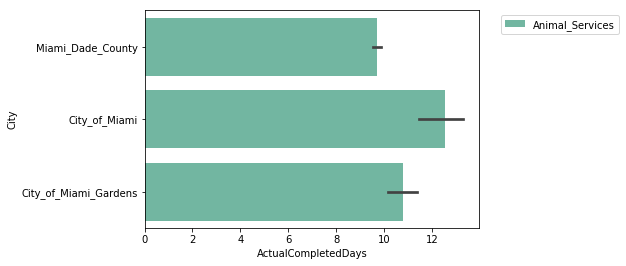

In [13]:
sns.barplot(data = data_clean[data_clean['City'].isin(['Miami_Dade_County','City_of_Miami', 'City_of_Miami_Gardens'])], x = 'ActualCompletedDays', y = 'City', hue = 'CaseOwner', palette = 'Set2')

# Because seaborn is built on top of matplotlib, 
# you can use matplotlib's plt.legends to control the position of the legend
plt.legend(bbox_to_anchor = (1.05, 1))
plt.show()

**Note:** The data from the "Miami-Dade" county label is most likely data that wasn't classified more specifically inside the county. To look at the distribution of data in this "overall" category, a frequency count of zip codes is performed.

In [14]:
data_clean_2 = data_clean[data_clean['City'].isin(['Miami_Dade_County'])]

In [15]:
data_clean_2['ZipPostalCode'].value_counts()

33147.0    10748
33177.0     7094
33032.0     6677
33165.0     5822
33157.0     5572
33033.0     5446
33186.0     5416
33142.0     5113
33175.0     4694
33176.0     4562
33155.0     4406
33196.0     3756
33015.0     3696
33187.0     3558
33170.0     3391
33167.0     3094
33150.0     2872
33193.0     2858
33173.0     2788
33183.0     2595
33179.0     2345
33055.0     2228
33168.0     2121
33185.0     2099
33030.0     2051
33184.0     1874
33161.0     1823
33031.0     1761
33162.0     1533
33143.0     1248
           ...  
33169.0      837
33156.0      701
33018.0      653
33189.0      599
33194.0      493
33180.0      481
33190.0      437
33166.0      429
33134.0      309
33181.0      219
33138.0      201
33178.0      181
33160.0      145
33012.0      139
33122.0      119
33054.0       47
33149.0       32
33154.0       26
33035.0       20
33039.0       13
33109.0       10
33014.0        8
33192.0        7
33013.0        2
33127.0        1
33130.0        1
33146.0        1
33152.0       

**Conclusion:** The data presented for the overall Miami-Dade county 'City' marker is too general to be included in specific data analysis unless performed by zip code.

In [16]:
data_miami_city = data_clean[data_clean['City'].isin(['City_of_Miami'])]

**Note:** To find a subset of the data that can be examined and analyzed specifically, the data is subsetted in the first trial to contain the largest group of geographically-sorted data.

In [17]:
data_miami_city['ZipPostalCode'].value_counts()

33127.0    4762
33142.0    4574
33125.0    4314
33135.0    2447
33145.0    2444
33133.0    2272
33150.0    1755
33138.0    1700
33137.0    1681
33126.0    1584
33130.0    1493
33136.0    1402
33134.0     932
33144.0     785
33129.0     681
33147.0     676
33128.0     637
33132.0     565
33131.0     468
33139.0      33
33149.0      19
33146.0      12
33101.0       6
33141.0       2
33184.0       1
33174.0       1
33140.0       1
33143.0       1
33167.0       1
33168.0       1
33172.0       1
33033.0       1
Name: ZipPostalCode, dtype: int64

In [18]:
data_miami_city

,TicketID,IssueType,CaseOwner,CaseOwnerDescription,StreetAddress,City,ZipPostalCode,NeighborhoodDistrictWardetc,CreatedYearMonth,TicketCreatedDateTime,...,TicketClosedDateTime,TicketStatus,XCoordinate,YCoordinate,Latitude,Longitude,LocationGeoCoded,MethodReceived,GoalDays,ActualCompletedDays
3,13-00000175,PIT BULL INVESTIGATION,Animal_Services,Animal Services,2985 SW 2ND ST,City_of_Miami,33135.0,District 5,20131.0,01/01/2013 08:51:26 AM,...,02/13/2013 12:01:38 PM,CLOSED,905190.573399,522934.268098,25.770336,-80.243301,"2985 SW 2ND ST\nMIAMI, Florida 33135\n(25.7703...",PHONE,30.0,43.0
6,13-00000178,ANIMAL BITE TO A PERSON,Animal_Services,Animal Services,21 SW 66TH AVE,City_of_Miami,33144.0,District 6,20131.0,01/01/2013 09:37:54 AM,...,01/11/2013 01:56:00 PM,CLOSED,885582.812500,522707.343750,25.770010,-80.302882,"21 SW 66TH AVE\nMIAMI, Florida 33144\n(25.7700...",PHONE,14.0,10.0
17,13-00000189,STRAY / DOG-AT-LARGE,Animal_Services,Animal Services,1500 BISCAYNE BLVD,City_of_Miami,33132.0,District 3,20131.0,01/01/2013 03:47:05 PM,...,01/13/2013 02:18:29 PM,CLOSED,922992.437500,530019.750000,25.789538,-80.189078,"1500 BISCAYNE BLVD\nMIAMI, Florida 33132\n(25....",PHONE,3.0,12.0
46,13-00000273,ANIMAL CRUELTY INVESTIGATION,Animal_Services,Animal Services,4160 POINCIANA AVE,City_of_Miami,33133.0,District 7,20131.0,01/02/2013 08:32:18 AM,...,01/10/2013 11:25:02 AM,CLOSED,899638.812500,504510.843750,25.719736,-80.260483,"4160 POINCIANA AVE\nMIAMI, Florida 33133\n(25....",PHONE,14.0,8.0
53,13-00000296,ANIMAL CRUELTY INVESTIGATION,Animal_Services,Animal Services,150 NW 71ST ST,City_of_Miami,33150.0,District 3,20131.0,01/02/2013 08:44:09 AM,...,01/09/2013 11:21:27 AM,CLOSED,919381.875000,548307.437500,25.839912,-80.199712,"150 NW 71ST ST\nMIAMI, Florida 33150\n(25.8399...",PHONE,14.0,7.0
54,13-00000305,TETHERED DOG,Animal_Services,Animal Services,2461 NW 14TH ST,City_of_Miami,33125.0,District 5,20131.0,01/02/2013 08:54:55 AM,...,01/03/2013 11:28:40 AM,CLOSED,907325.312500,529088.125000,25.787233,-80.236706,"2461 NW 14TH ST\nMIAMI, Florida 33125\n(25.787...",PHONE,14.0,1.0
82,13-00000436,STRAY / DOG-AT-LARGE,Animal_Services,Animal Services,5729 NW 6TH AVE,City_of_Miami,33127.0,District 3,20131.0,01/02/2013 10:08:03 AM,...,01/16/2013 02:36:40 PM,CLOSED,917385.816088,543976.042313,25.828029,-80.205860,"5729 NW 6TH AVE\nMIAMI, Florida 33127\n(25.828...",PHONE,3.0,14.0
91,13-00000485,PET ACCOUNT UPDATE,Animal_Services,Animal Services,2918 SW 3RD ST,City_of_Miami,33135.0,District 5,20131.0,01/02/2013 10:31:14 AM,...,01/02/2013 01:09:33 PM,CLOSED,905794.687500,522449.250000,25.768992,-80.241473,"2918 SW 3RD ST\nMIAMI, Florida 33135\n(25.7689...",PHONE,30.0,0.0
92,13-00000493,INJURED ANIMAL,Animal_Services,Animal Services,4330 NE 2ND AVE,City_of_Miami,33137.0,District 3,20131.0,01/02/2013 10:35:22 AM,...,01/02/2013 11:07:55 AM,CLOSED,922062.437500,539686.125000,25.816148,-80.191724,"4330 NE 2ND AVE\nMIAMI, Florida 33137\n(25.816...",PHONE,1.0,0.0
124,13-00000623,STRAY / DOG-AT-LARGE,Animal_Services,Animal Services,1030 NW 43RD ST,City_of_Miami,33127.0,District 3,20131.0,01/02/2013 11:53:23 AM,...,01/16/2013 02:31:14 PM,CLOSED,915084.312500,539199.250000,25.814925,-80.212944,"1030 NW 43RD ST\nMIAMI, Florida 33127\n(25.814...",PHONE,3.0,14.0


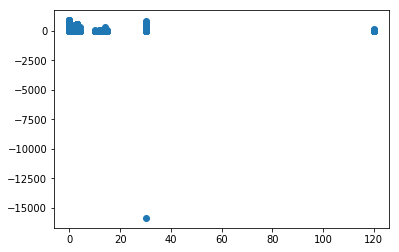

In [19]:
plt.scatter(data_miami_city['GoalDays'], data_miami_city['ActualCompletedDays'])

**Note:** There is some corrupted data affecting the actual completed days column inside the subset. The first step to combat this and clean the data further is to remove null values and observe whether this has an impact.

In [20]:
data_miami_city = data_miami_city[data_miami_city['ActualCompletedDays'].notnull()]

In [21]:
data_miami_city

,TicketID,IssueType,CaseOwner,CaseOwnerDescription,StreetAddress,City,ZipPostalCode,NeighborhoodDistrictWardetc,CreatedYearMonth,TicketCreatedDateTime,...,TicketClosedDateTime,TicketStatus,XCoordinate,YCoordinate,Latitude,Longitude,LocationGeoCoded,MethodReceived,GoalDays,ActualCompletedDays
3,13-00000175,PIT BULL INVESTIGATION,Animal_Services,Animal Services,2985 SW 2ND ST,City_of_Miami,33135.0,District 5,20131.0,01/01/2013 08:51:26 AM,...,02/13/2013 12:01:38 PM,CLOSED,905190.573399,522934.268098,25.770336,-80.243301,"2985 SW 2ND ST\nMIAMI, Florida 33135\n(25.7703...",PHONE,30.0,43.0
6,13-00000178,ANIMAL BITE TO A PERSON,Animal_Services,Animal Services,21 SW 66TH AVE,City_of_Miami,33144.0,District 6,20131.0,01/01/2013 09:37:54 AM,...,01/11/2013 01:56:00 PM,CLOSED,885582.812500,522707.343750,25.770010,-80.302882,"21 SW 66TH AVE\nMIAMI, Florida 33144\n(25.7700...",PHONE,14.0,10.0
17,13-00000189,STRAY / DOG-AT-LARGE,Animal_Services,Animal Services,1500 BISCAYNE BLVD,City_of_Miami,33132.0,District 3,20131.0,01/01/2013 03:47:05 PM,...,01/13/2013 02:18:29 PM,CLOSED,922992.437500,530019.750000,25.789538,-80.189078,"1500 BISCAYNE BLVD\nMIAMI, Florida 33132\n(25....",PHONE,3.0,12.0
46,13-00000273,ANIMAL CRUELTY INVESTIGATION,Animal_Services,Animal Services,4160 POINCIANA AVE,City_of_Miami,33133.0,District 7,20131.0,01/02/2013 08:32:18 AM,...,01/10/2013 11:25:02 AM,CLOSED,899638.812500,504510.843750,25.719736,-80.260483,"4160 POINCIANA AVE\nMIAMI, Florida 33133\n(25....",PHONE,14.0,8.0
53,13-00000296,ANIMAL CRUELTY INVESTIGATION,Animal_Services,Animal Services,150 NW 71ST ST,City_of_Miami,33150.0,District 3,20131.0,01/02/2013 08:44:09 AM,...,01/09/2013 11:21:27 AM,CLOSED,919381.875000,548307.437500,25.839912,-80.199712,"150 NW 71ST ST\nMIAMI, Florida 33150\n(25.8399...",PHONE,14.0,7.0
54,13-00000305,TETHERED DOG,Animal_Services,Animal Services,2461 NW 14TH ST,City_of_Miami,33125.0,District 5,20131.0,01/02/2013 08:54:55 AM,...,01/03/2013 11:28:40 AM,CLOSED,907325.312500,529088.125000,25.787233,-80.236706,"2461 NW 14TH ST\nMIAMI, Florida 33125\n(25.787...",PHONE,14.0,1.0
82,13-00000436,STRAY / DOG-AT-LARGE,Animal_Services,Animal Services,5729 NW 6TH AVE,City_of_Miami,33127.0,District 3,20131.0,01/02/2013 10:08:03 AM,...,01/16/2013 02:36:40 PM,CLOSED,917385.816088,543976.042313,25.828029,-80.205860,"5729 NW 6TH AVE\nMIAMI, Florida 33127\n(25.828...",PHONE,3.0,14.0
91,13-00000485,PET ACCOUNT UPDATE,Animal_Services,Animal Services,2918 SW 3RD ST,City_of_Miami,33135.0,District 5,20131.0,01/02/2013 10:31:14 AM,...,01/02/2013 01:09:33 PM,CLOSED,905794.687500,522449.250000,25.768992,-80.241473,"2918 SW 3RD ST\nMIAMI, Florida 33135\n(25.7689...",PHONE,30.0,0.0
92,13-00000493,INJURED ANIMAL,Animal_Services,Animal Services,4330 NE 2ND AVE,City_of_Miami,33137.0,District 3,20131.0,01/02/2013 10:35:22 AM,...,01/02/2013 11:07:55 AM,CLOSED,922062.437500,539686.125000,25.816148,-80.191724,"4330 NE 2ND AVE\nMIAMI, Florida 33137\n(25.816...",PHONE,1.0,0.0
124,13-00000623,STRAY / DOG-AT-LARGE,Animal_Services,Animal Services,1030 NW 43RD ST,City_of_Miami,33127.0,District 3,20131.0,01/02/2013 11:53:23 AM,...,01/16/2013 02:31:14 PM,CLOSED,915084.312500,539199.250000,25.814925,-80.212944,"1030 NW 43RD ST\nMIAMI, Florida 33127\n(25.814...",PHONE,3.0,14.0


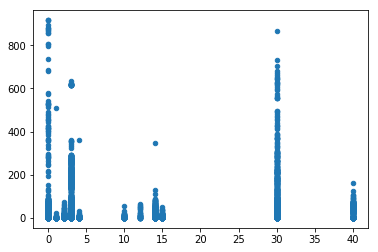

In [22]:
plt.scatter(data_miami_city['GoalDays'].clip_upper(40), data_miami_city['ActualCompletedDays'].clip_lower(0), s= 20)

**Observations:** Eliminating the null data inside the 'completed days' column did not appear to have any effect, but by using the clipping function inside pandas the corrupted data was able to be taken out of the group.

A clip was also taken of 'Goal Days' on the Y-axis to better see the spread of the data on the y-axis, but this will not be implemented permanently.

In [23]:
data_miami_city['ActualCompletedDays'].clip_lower(0).head()

3     43.0
6     10.0
17    12.0
46     8.0
53     7.0
Name: ActualCompletedDays, dtype: float64

In [24]:
data_miami_city['ActualCompletedDays'].clip_lower(0).value_counts()

0.0      9444
1.0      6459
2.0      2854
3.0      2512
4.0      1446
5.0      1148
6.0       945
7.0       854
8.0       718
9.0       582
10.0      476
11.0      442
13.0      418
12.0      414
14.0      368
15.0      305
16.0      290
17.0      228
19.0      216
18.0      196
20.0      164
21.0      161
28.0      159
22.0      152
24.0      144
25.0      136
29.0      130
23.0      124
35.0      122
36.0      121
         ... 
704.0       1
804.0       1
355.0       1
395.0       1
867.0       1
357.0       1
738.0       1
278.0       1
238.0       1
115.0       1
557.0       1
650.0       1
446.0       1
261.0       1
290.0       1
454.0       1
734.0       1
452.0       1
124.0       1
277.0       1
418.0       1
350.0       1
466.0       1
481.0       1
126.0       1
874.0       1
495.0       1
218.0       1
199.0       1
209.0       1
Name: ActualCompletedDays, Length: 388, dtype: int64

In [25]:
data_miami_city['GoalDays'].value_counts()

30.0     8784
3.0      8743
14.0     6187
1.0      5460
2.0      2606
0.0      1817
4.0       678
120.0     319
15.0      155
10.0       94
12.0       35
Name: GoalDays, dtype: int64

**Observation:** It appears that there are predetermined intervals and values that are placed for goal days, but the number recorded for days completed is based on actual measurements. Goal Days can be viewed as discrete 'bins' in which the actual completed days are placed in for classification.

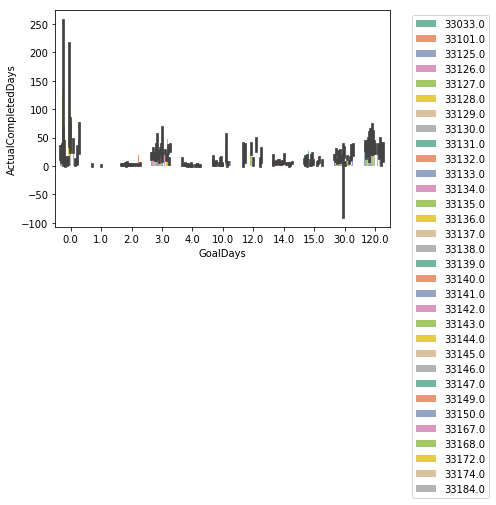

In [26]:
sns.barplot(data = data_miami_city, x = 'GoalDays', y = 'ActualCompletedDays', hue = 'ZipPostalCode', palette = 'Set2')

# Because seaborn is built on top of matplotlib, 
# you can use matplotlib's plt.legends to control the position of the legend
plt.legend(bbox_to_anchor = (1.05, 1))
plt.show()

**Note:** This data is still far too general to be able to determine any meaningful trends within it. Referring to a previous frequency count about the type of issues seen inside animal services, there are two categories dealing with "pit-bull investigation." The next trial will be to narrow the data further and see if it helps.

In [27]:
data_pitbull = data_miami_city[data_miami_city['IssueType'].isin(['PIT BULL INVESTIGATION', 'PIT BULL FOLLOW-UP INVESTIGATION'])]

In [28]:
data_pitbull

,TicketID,IssueType,CaseOwner,CaseOwnerDescription,StreetAddress,City,ZipPostalCode,NeighborhoodDistrictWardetc,CreatedYearMonth,TicketCreatedDateTime,...,TicketClosedDateTime,TicketStatus,XCoordinate,YCoordinate,Latitude,Longitude,LocationGeoCoded,MethodReceived,GoalDays,ActualCompletedDays
3,13-00000175,PIT BULL INVESTIGATION,Animal_Services,Animal Services,2985 SW 2ND ST,City_of_Miami,33135.0,District 5,20131.0,01/01/2013 08:51:26 AM,...,02/13/2013 12:01:38 PM,CLOSED,905190.573399,522934.268098,25.770336,-80.243301,"2985 SW 2ND ST\nMIAMI, Florida 33135\n(25.7703...",PHONE,30.0,43.0
164,13-00000761,PIT BULL INVESTIGATION,Animal_Services,Animal Services,4935 SW 6TH ST,City_of_Miami,33134.0,District 6,20131.0,01/02/2013 01:25:15 PM,...,02/21/2013 11:05:56 AM,CLOSED,NaN,NaN,NaN,NaN,"4935 SW 6TH ST\nMIAMI, Florida 33134\n",PHONE,30.0,50.0
1245,13-00004590,PIT BULL INVESTIGATION,Animal_Services,Animal Services,253 NW 65TH ST,City_of_Miami,33150.0,District 3,20131.0,01/07/2013 09:59:42 AM,...,02/21/2013 02:39:14 PM,CLOSED,918697.513613,546527.078832,25.835025,-80.201826,"253 NW 65TH ST\nMIAMI, Florida 33150\n(25.8350...",PHONE,30.0,45.0
1605,13-00005799,PIT BULL INVESTIGATION,Animal_Services,Animal Services,3011 NW 1ST ST,City_of_Miami,33125.0,District 5,20131.0,01/08/2013 08:29:45 AM,...,02/21/2013 01:57:26 PM,CLOSED,904919.875000,524285.500000,25.774058,-80.244099,"3011 NW 1ST ST\nMIAMI, Florida 33125\n(25.7740...",PHONE,30.0,44.0
1833,13-00007049,PIT BULL INVESTIGATION,Animal_Services,Animal Services,1400 NW 3RD ST,City_of_Miami,33125.0,District 5,20131.0,01/08/2013 05:58:00 PM,...,02/21/2013 01:57:23 PM,CLOSED,913420.000000,525083.562500,25.776117,-80.218257,"1400 NW 3RD ST\nMIAMI, Florida 33125\n(25.7761...",PHONE,30.0,44.0
2711,13-00010212,PIT BULL INVESTIGATION,Animal_Services,Animal Services,6300 NW MIAMI CT,City_of_Miami,33150.0,District 3,20131.0,01/11/2013 11:05:50 AM,...,02/21/2013 08:19:00 AM,DUP,NaN,NaN,NaN,NaN,"6300 NW MIAMI CT\nMIAMI, Florida 33150\n",PHONE,30.0,41.0
3452,13-00012840,PIT BULL INVESTIGATION,Animal_Services,Animal Services,811 NW 66TH ST,City_of_Miami,33150.0,District 3,20131.0,01/14/2013 03:38:34 PM,...,02/21/2013 02:39:15 PM,CLOSED,915681.500000,546649.750000,25.835413,-80.210993,"811 NW 66TH ST\nMIAMI, Florida 33150\n(25.8354...",PHONE,30.0,38.0
4014,13-00014835,PIT BULL INVESTIGATION,Animal_Services,Animal Services,261 NW 75TH ST,City_of_Miami,33150.0,District 3,20131.0,01/16/2013 08:46:28 AM,...,02/21/2013 02:45:34 PM,CLOSED,918550.687500,549708.000000,25.843779,-80.202214,"261 NW 75TH ST\nMIAMI, Florida 33150\n(25.8437...",PHONE,30.0,36.0
4187,13-00015758,PIT BULL INVESTIGATION,Animal_Services,Animal Services,124 SW S RIVER DR,City_of_Miami,33130.0,District 5,20131.0,01/16/2013 03:09:42 PM,...,07/27/2014 02:30:22 PM,CLOSED,919048.757653,523874.014669,25.772697,-80.201176,"124 SW S RIVER DR\nMIAMI, Florida 33130\n(25.7...",INHOUSE,30.0,557.0
4189,13-00015779,PIT BULL INVESTIGATION,Animal_Services,Animal Services,3032 SW 13TH ST,City_of_Miami,33145.0,District 7,20131.0,01/16/2013 03:12:15 PM,...,01/16/2013 03:15:56 PM,CLOSED,905238.372000,519235.498000,25.760159,-80.243220,"3032 SW 13TH ST\nMIAMI, Florida 33145\n(25.760...",EMAIL,30.0,0.0


In [29]:
data_pitbull['GoalDays'].value_counts()

30.0    738
Name: GoalDays, dtype: int64

**Observation:** It appears that pitbull investigations are all classified with a goal time of 30 days - the number of investigations regarding pit bulls is also relatively small, so it seems best to go back and expand the search again.

In [30]:
data_stray_dogs = data_miami_city[data_miami_city['IssueType'].isin(['STRAY / DOG-AT-LARGE', 'STRAY DOG PICK UP - MD'])]

In [31]:
data_stray_dogs.shape

(10446, 21)

**Note:** The new selection of data - stray-dog related incidents within the city of miami - contains enough data points to run statistical analyses on, and is specific enough that questions can be directly generated and answered.

In the graph below, incidents were sorted by districts instead of zip codes to ensure that all bins had a large, analyzable set of data

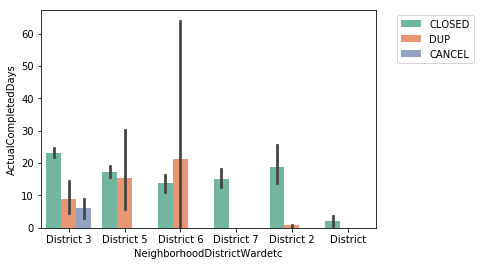

In [32]:
sns.barplot(data = data_stray_dogs, x = 'NeighborhoodDistrictWardetc', y = 'ActualCompletedDays', hue = 'TicketStatus', palette = 'Set2')

# Because seaborn is built on top of matplotlib, 
# you can use matplotlib's plt.legends to control the position of the legend
plt.legend(bbox_to_anchor = (1.05, 1))
plt.show()

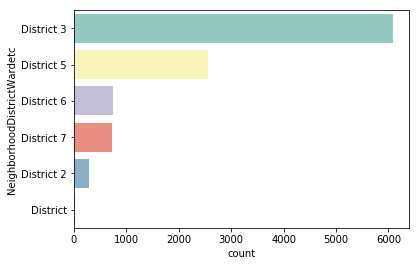

In [33]:
sns.countplot(y = 'NeighborhoodDistrictWardetc', data = data_stray_dogs, palette = 'Set3')
plt.show()

**Observation:** There appears to be some data for which a neighborhood is not recorded, but otherwise the distribution of data is enough to perform some tests on. This can be further investigated by removing any entries with 'District' as their heading, or removing null data that may be conflicting.

Because of the issues with 'Goal Days' settings in the pitbull subset, a frequency count will first be made to determine what range of numerical values is present in the current dataset.

In [34]:
data_stray_dogs['GoalDays'].value_counts()

3.0    7840
2.0    2606
Name: GoalDays, dtype: int64

**Note:** While the initial interest was in comparing response times - goal time and actual completed time - for different geographical locations within miami, this does not appear feasible because of the pre-generated nature of Goal Days. Therefore, other questions will be generated by looking at other columns and finding similarities.

In [42]:
data_stray_dogs.head()

,TicketID,IssueType,CaseOwner,CaseOwnerDescription,StreetAddress,City,ZipPostalCode,NeighborhoodDistrictWardetc,CreatedYearMonth,TicketCreatedDateTime,...,TicketClosedDateTime,TicketStatus,XCoordinate,YCoordinate,Latitude,Longitude,LocationGeoCoded,MethodReceived,GoalDays,ActualCompletedDays
17,13-00000189,STRAY / DOG-AT-LARGE,Animal_Services,Animal Services,1500 BISCAYNE BLVD,City_of_Miami,33132.0,District 3,20131.0,01/01/2013 03:47:05 PM,...,01/13/2013 02:18:29 PM,CLOSED,922992.437500,530019.750000,25.789538,-80.189078,"1500 BISCAYNE BLVD\nMIAMI, Florida 33132\n(25....",PHONE,3.0,12.0
82,13-00000436,STRAY / DOG-AT-LARGE,Animal_Services,Animal Services,5729 NW 6TH AVE,City_of_Miami,33127.0,District 3,20131.0,01/02/2013 10:08:03 AM,...,01/16/2013 02:36:40 PM,CLOSED,917385.816088,543976.042313,25.828029,-80.205860,"5729 NW 6TH AVE\nMIAMI, Florida 33127\n(25.828...",PHONE,3.0,14.0
124,13-00000623,STRAY / DOG-AT-LARGE,Animal_Services,Animal Services,1030 NW 43RD ST,City_of_Miami,33127.0,District 3,20131.0,01/02/2013 11:53:23 AM,...,01/16/2013 02:31:14 PM,CLOSED,915084.312500,539199.250000,25.814925,-80.212944,"1030 NW 43RD ST\nMIAMI, Florida 33127\n(25.814...",PHONE,3.0,14.0
131,13-00000649,STRAY / DOG-AT-LARGE,Animal_Services,Animal Services,3502 SW 2ND ST,City_of_Miami,33135.0,District 5,20131.0,01/02/2013 12:01:24 PM,...,01/16/2013 02:28:21 PM,CLOSED,902211.806123,522845.557398,25.770139,-80.252353,"3502 SW 2ND ST\nMIAMI, Florida 33135\n(25.7701...",PHONE,3.0,14.0
178,13-00000790,STRAY / DOG-AT-LARGE,Animal_Services,Animal Services,1400 BRICKELL AVE,City_of_Miami,33131.0,District 5,20131.0,01/02/2013 01:45:05 PM,...,01/16/2013 02:42:56 PM,CLOSED,922035.562500,519403.687500,25.760348,-80.192184,"1400 BRICKELL AVE\nMIAMI, Florida 33131\n(25.7...",WEB,3.0,14.0


**Note:** The 2-3 day bin difference in Goal Days is not meaningful, and any comparison generated based on this data will not be helpful or easy to make conclusions from. Because of the increase in use of technology and the modernization of public services, it would be interesting to look instead at response times for calls received through different methods. This begins with a frequency count of the 'MethodReceived' Column.

In [35]:
data_stray_dogs['MethodReceived'].value_counts()

PHONE          10107
INHOUSE          111
WEB              102
IPHONE            45
MOBILE            23
EMAIL             21
ANDROID           19
PROACT             9
WALKIN             3
MAIL               2
OTHER              1
PHONC              1
SOCIALMEDIA        1
MAYOFF             1
Name: MethodReceived, dtype: int64

**Observation:** This appears to be a good way to stratify data, excluding outliers like Social Media and typos like Phonc. First, a barplot is generated from the data to determine any immediately obvious correlations. 

No handles with labels found to put in legend.


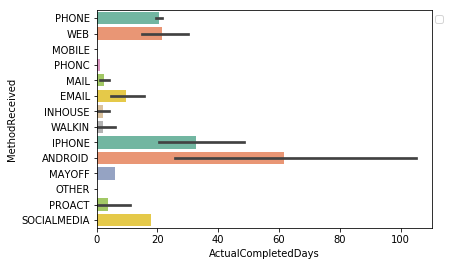

In [37]:
sns.barplot(data = data_stray_dogs, x = 'ActualCompletedDays', y = 'MethodReceived', palette = 'Set2')

# Because seaborn is built on top of matplotlib, 
# you can use matplotlib's plt.legends to control the position of the legend
plt.legend(bbox_to_anchor = (1.05, 1))
plt.show()

In [39]:
stray_dog_phone = data_stray_dogs[data_stray_dogs['MethodReceived'].isin(['PHONE'])]
stray_dog_web = data_stray_dogs[data_stray_dogs['MethodReceived'].isin(['WEB'])]
mean_phone = np.mean(stray_dog_phone['ActualCompletedDays'])
print(mean_phone)
mean_web = np.mean(stray_dog_web['ActualCompletedDays'])
print(mean_web)

20.426536064113982
21.627450980392158


**Observation:** There does not appear to be a difference between the means of both datasets, but whether or not this is supported by the data will be seen in a two-set t-test comparing the completed days data.

In [41]:
ss.stats.ttest_ind(stray_dog_phone['ActualCompletedDays'], stray_dog_web['ActualCompletedDays'])

Ttest_indResult(statistic=-0.23868339214898499, pvalue=0.81135588745171)

**Results of t-test:** Based on the t-statistic and the large p-value generated, it can be determined that there is no significant difference in response times between phone calls and web submissions of service tickets. 

These are not the only two sets of data, though they are the largest. To look at the data in another light, the bins for mobile, iphone, and android are combined into a larger bin, 'Cell,' which can be compared against the web data.

In [42]:
stray_dog_cell = data_stray_dogs[data_stray_dogs['MethodReceived'].isin(['ANDROID', 'IPHONE', 'MOBILE'])]
stray_dog_web = data_stray_dogs[data_stray_dogs['MethodReceived'].isin(['WEB'])]
mean_cell = np.mean(stray_dog_cell['ActualCompletedDays'])
print(mean_cell)
mean_web = np.mean(stray_dog_web['ActualCompletedDays'])
print(mean_web)

30.42528735632184
21.627450980392158


**Observation:** The means generated for both sets of data appear to be different, but this does not mean that there will be a significance to any findings.

In [43]:
ss.stats.ttest_ind(stray_dog_cell['ActualCompletedDays'], stray_dog_web['ActualCompletedDays'])

Ttest_indResult(statistic=1.2355742194503823, pvalue=0.21816683347901333)

**Results of t-test:** Although there was an apparent different in response time for the two sets of data, the p-value indicates that the confidence level is at 80%, and therefore not statistically significant.

To be thorough, all sets of data should be checked against each other for statistical significance. However, because of the small sample size, this is not feasible. Further investigation of the phone-response time correlation can be observed on a larger scale by looking at all data collected in the city of miami.

No handles with labels found to put in legend.


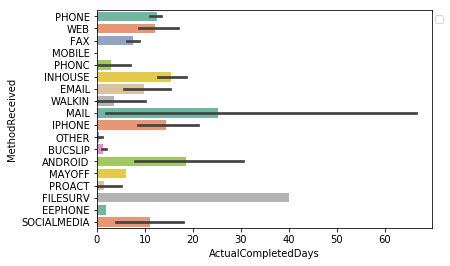

In [44]:
sns.barplot(data = data_miami_city, x = 'ActualCompletedDays', y = 'MethodReceived', palette = 'Set2')

# Because seaborn is built on top of matplotlib, 
# you can use matplotlib's plt.legends to control the position of the legend
plt.legend(bbox_to_anchor = (1.05, 1))
plt.show()

In [45]:
data_miami_city['MethodReceived'].value_counts()

PHONE          32505
INHOUSE         1117
WEB              310
FAX              279
EMAIL            181
IPHONE           160
WALKIN           156
ANDROID           71
MOBILE            38
PROACT            26
MAIL              17
PHONC              8
BUCSLIP            3
OTHER              2
SOCIALMEDIA        2
FILESURV           1
EEPHONE            1
MAYOFF             1
Name: MethodReceived, dtype: int64

In [46]:
miami_phone = data_miami_city[data_miami_city['MethodReceived'].isin(['PHONE'])]
miami_web = data_miami_city[data_miami_city['MethodReceived'].isin(['WEB'])]
mean_phone = np.mean(miami_phone['ActualCompletedDays'])
print(mean_phone)
mean_web = np.mean(miami_web['ActualCompletedDays'])
print(mean_web)

12.53068758652515
12.174193548387096


In [48]:
ss.stats.ttest_ind(miami_phone['ActualCompletedDays'], miami_web['ActualCompletedDays'])

Ttest_indResult(statistic=0.06318966381454987, pvalue=0.9496158603076211)

**Results of t-test:** While the hypothesis put forward about differences in response times is once again not supported by the larger set of data, the observed trend holds true.

In [49]:
miami_phone = data_miami_city[data_miami_city['MethodReceived'].isin(['PHONE'])]
miami_inhouse = data_miami_city[data_miami_city['MethodReceived'].isin(['INHOUSE'])]
mean_phone = np.mean(miami_phone['ActualCompletedDays'])
print(mean_phone)
mean_inhouse = np.mean(miami_inhouse['ActualCompletedDays'])
print(mean_inhouse)

12.53068758652515
15.505819158460161


In [50]:
ss.stats.ttest_ind(miami_phone['ActualCompletedDays'], miami_inhouse['ActualCompletedDays'])

Ttest_indResult(statistic=-0.9978776668343887, pvalue=0.3183458646390622)

**Results of t-test:** The larger trend holds for the comparison of in-house data and data received over phone, and shows that there is no large difference in response times for different methods of receiving for service tickets. It can be inferred from this data that service workers are not showing preference for certain communication types when determining which tasks should be addressed, and how long they take to be closed.